### Test 1) data reading and write out; 2) data merge; 3) data split into tiles; 4) data split into files; 5) data subseting by region and time.


In [20]:
import os
root_proj = '/Users/luo/OneDrive/GitHub/icesat-tool'
os.chdir(root_proj)


In [21]:
import h5py
import cartopy.crs as ccrs
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.transform_xy import coor2coor
import numpy as np


#### **<font color=Yellow>Read</font>** <u>atl06/atl03</u> data

In [22]:
# !h5ls data/icesat2/pineisland_ATL06/processed_ATL06_20190102185636_00810212_005_01.h5
### ATL03
# !python utils_main/read_atl03.py data/icesat2/pineisland_ATL03_down/*ATL03*.h5 -o data/icesat2/pineisland_ATL03_readout -n 4
### ATL06
!python utils_main/read_atl06.py data/icesat2/pineisland_ATL06_down/*ATL06*.h5 -o data/icesat2/pineisland_ATL06_readout -n 4


running in parallel (4 jobs) ...
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
written file: data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190107053454_01490210_005_01_readout.h5
written file: data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190102185636_00810212_005_01_readout.h5
written file: data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190103054314_00880210_005_01_readout.h5
written file: data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190106184815_01420212_005_01_readout.h5
[Parallel(n_jobs=4)]: Done   4 out of   9 | elapsed:    3.4s remaining:    4.3s
written file: data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190123174919_04010212_005_01_readout.h5
written file: data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190111052631_02100210_005_01_readout.h5
[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:    3.6s remaining:    1.8s
written file: data/icesat2/pineisland_ATL06_readout/processed_ATL06_2019

#### **<font color=Yellow>Merge</font>** ATL03/ATL06 multiple files into one files.

In [23]:
### ATL03
# !python utils_main/merge_files.py data/icesat2/pineisland_ATL03_readout/*ATL03*_readout.h5 -o data/icesat2/pineisland_ATL03_readout/pineisland_ATL03_201901.h5
### ATL06
!python utils_main/merge_files.py data/icesat2/pineisland_ATL06_readout/*ATL06*_readout.h5 -o data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5


Running sequential code ...
Calculating lenght of output from all input files ...
('reading', 'data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190102185636_00810212_005_01_readout.h5')
('reading', 'data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190103054314_00880210_005_01_readout.h5')
('reading', 'data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190106184815_01420212_005_01_readout.h5')
('reading', 'data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190107053454_01490210_005_01_readout.h5')
('reading', 'data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190111052631_02100210_005_01_readout.h5')
('reading', 'data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190115051807_02710210_005_01_readout.h5')
('reading', 'data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190123174919_04010212_005_01_readout.h5')
('reading', 'data/icesat2/pineisland_ATL06_readout/processed_ATL06_20190127174104_04620212_005_01_readout.h5')
('reading', 'data/icesat2/pine

#### **<font color=Yellow>Split</font>** the ATL06 data into tiles.


In [24]:
# !h5ls data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5
!python utils_main/split_tiles.py data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5 -d 25000 25000 -c h_lon h_lat -p 3031 -n 4



Input arguments:
('file', ['data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5'])
('bbox', [None, None, None, None])
('dxy', [25000.0, 25000.0])
('bf', [0])
('coord_name', ['h_lon', 'h_lat'])
('proj', ['3031'])
('njobs', [4])
generating list of tasks (files x tiles) ...
('number of files:', 1)
('number of tiles:', 9)
('number of tasks:', 9)
running parallel code (4 jobs) ...
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
('tile 002: #points', 9605, '...')
('tile 001: #points', 14604, '...')
('tile 003: #points', 10049, '...')
('tile 004: #points', 14489, '...')
[Parallel(n_jobs=4)]: Done   4 out of   9 | elapsed:    3.7s remaining:    4.7s
('tile 005: #points', 16985, '...')
('tile 006: #points', 12472, '...')
[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:    3.8s remaining:    1.9s
('tile 007: #points', 9399, '...')
('tile 009: #points', 7805, '...')
('tile 008: #points', 15733, '...')
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:

#### **<font color=Yellow> Split </font>** the ATL06 data into multiple files.

In [25]:
# !h5ls data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5 
!python utils_main/split_files.py data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5 -k 5


Running sequential code ...
('input -> ', 'data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5')
[22229, 22228, 22228, 22228, 22228]
('output ->', 'data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901_file_000.h5')
('output ->', 'data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901_file_001.h5')
('output ->', 'data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901_file_002.h5')
('output ->', 'data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901_file_003.h5')
('output ->', 'data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901_file_004.h5')


#### **<font color=Yellow> Subset </font>** ATL06 data by given region and date range.

In [26]:
# !h5ls data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5 
!python utils_main/subset_icesat.py data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5  -r -101 -100.3 -75.1 -75 -t 2019 2019.05 -c h_lon h_lat -tn t_dyr


Input arguments:
('ifile', ['data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5'])
('extent', [-101.0, -100.3, -75.1, -75.0])
('time_range', [2019.0, 2019.05])
('mask_file', [None])
('coord_name', ['h_lon', 'h_lat'])
('time_name', ['t_dyr'])
('input -> ', 'data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5')
('output ->', 'data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901_subs.h5')


### **Visualization**

In [27]:
path_img = 'data/rs-img/pineisland_S3A_20180207T115228_20180207T115528.tif'
s3_img, s3_img_info = readTiff(path_img)
print(s3_img_info)


{'geoextent': (-128531.75715377461, 67068.24284622539, 1480586.1629197113, 1668386.1629197113), 'geotrans': (-128531.75715377461, 300.0, 0.0, 1668386.1629197113, 0.0, -300.0), 'geosrs': '32717', 'row': 626, 'col': 652, 'bands': 3}


### 1. Test data spliting (tiles spliting).

In [28]:
## show splited tiles
with h5py.File('data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5','r') as f_a:
    lat_merge   = f_a['h_lat'][:]
    lon_merge   = f_a['h_lon'][:]
    h_elv_merge = f_a['h_li'][:]
    t_yrs_merge = f_a['t_dyr'][:]

with h5py.File('data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901_buff_0_epsg_3031_tile_001.h5','r') as f_a:
    lat_tile_1   = f_a['h_lat'][:]
    lon_tile_1   = f_a['h_lon'][:]
    h_elv_tile_1 = f_a['h_li'][:]
    t_yrs_tile_1 = f_a['t_dyr'][:]

with h5py.File('data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901_buff_0_epsg_3031_tile_002.h5','r') as f_a:
    lat_tile_2   = f_a['h_lat'][:]
    lon_tile_2   = f_a['h_lon'][:]
    h_elv_tile_2 = f_a['h_li'][:]
    t_yrs_tile_2 = f_a['t_dyr'][:]


x_ad, y_ad = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_merge, y=lat_merge)
x_tile_1, y_tile_1 = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_tile_1, y=lat_tile_1)
x_tile_2, y_tile_2 = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_tile_2, y=lat_tile_2)


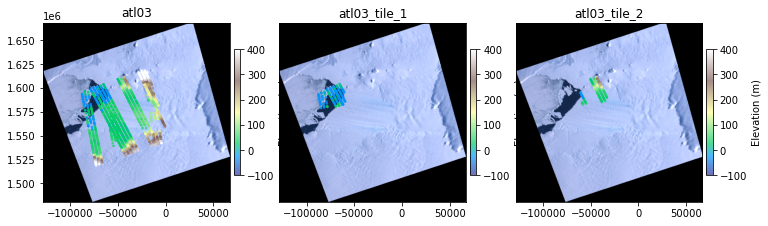

In [29]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
imgShow(s3_img, extent=s3_img_info['geoextent'], color_bands=(0, 1, 2), clip_percent=5)
plt.scatter(x_ad[::100], y_ad[::100], s=3, c = h_elv_merge[::100], alpha=.7, cmap='terrain')
plt.clim([-100,400])
plt.title('atl03')
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')

plt.subplot(1,3,2)
imgShow(s3_img, extent=s3_img_info['geoextent'], color_bands=(0, 1, 2), clip_percent=5)
plt.scatter(x_tile_1[::100], y_tile_1[::100], s=3, c = h_elv_tile_1[::100], alpha=.7, cmap='terrain')
plt.clim([-100,400])
plt.yticks([])
plt.title('atl03_tile_1')
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')

plt.subplot(1,3,3)
imgShow(s3_img, extent=s3_img_info['geoextent'], color_bands=(0, 1, 2), clip_percent=5)
plt.scatter(x_tile_2[::100], y_tile_2[::100], s=3, c = h_elv_tile_2[::100], alpha=.7, cmap='terrain')
plt.clim([-100,400])
plt.yticks([])
plt.title('atl03_tile_2')
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')


### 2. Test data subseting

In [30]:
with h5py.File('data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901.h5','r') as f_a:
    lat_merge_ad   = f_a['h_lat'][:]
    lon_merge_ad   = f_a['h_lon'][:]
    h_elv_merge_ad = f_a['h_li'][:]
    t_yrs_merge_ad = f_a['t_dyr'][:]

with h5py.File('data/icesat2/pineisland_ATL06_readout/pineisland_ATL06_201901_subs.h5','r') as f_a:
    lat_merge_subs   = f_a['h_lat'][:]
    lon_merge_subs   = f_a['h_lon'][:]
    h_elv_merge_subs = f_a['h_li'][:]
    t_yrs_merge_subs = f_a['t_dyr'][:]

x_merge, y_merge = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_merge_ad, y=lat_merge_ad)
x_merge_subs, y_merge_subs = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_merge_subs, y=lat_merge_subs)


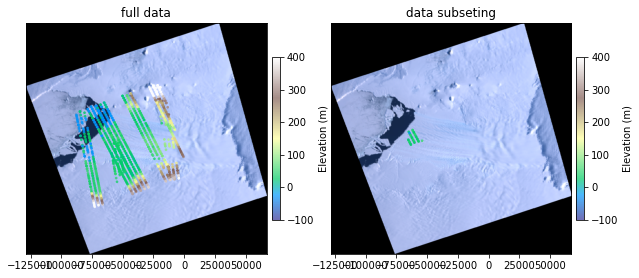

In [31]:
fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
imgShow(s3_img, extent=s3_img_info['geoextent'], color_bands=(0, 1, 2), clip_percent=5)
plt.scatter(x_merge[::100], y_merge[::100], s=3, c=h_elv_merge_ad[::100], alpha=.7, cmap='terrain')
plt.clim([-100,400])
plt.yticks([])
plt.title('full data')
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')

plt.subplot(1,2,2)
imgShow(s3_img, extent=s3_img_info['geoextent'], color_bands=(0, 1, 2), clip_percent=5)
plt.scatter(x_merge_subs[::100], y_merge_subs[::100], s=3, c=h_elv_merge_subs[::100], alpha=.7, cmap='terrain')
plt.clim([-100,400])
plt.yticks([])
plt.title('data subseting')
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')
